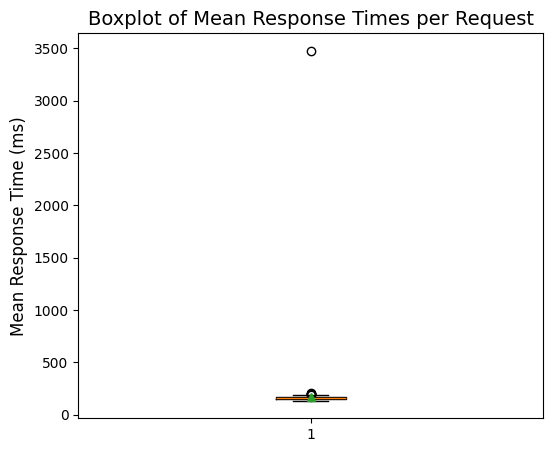

In [8]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

path = "./data/auto"

# Load all CSV files
csv_files = glob.glob(path + "/*.csv")

dfs = [pd.read_csv(file, usecols=["response_time_ms"]) for file in csv_files]

combined = pd.concat(dfs, axis=1)
combined.columns = [f"run_{i + 1}" for i in range(len(dfs))]

# Display the combined DataFrame
combined.head()

# Create the boxplot
row_means = combined.mean(axis=1)

# Create a boxplot of row means
plt.figure(figsize=(6,5))
plt.boxplot(row_means, showmeans=True)

# Add title and labels
plt.title("Boxplot of Mean Response Times per Request", fontsize=14)
plt.ylabel("Mean Response Time (ms)", fontsize=12)

plt.show()


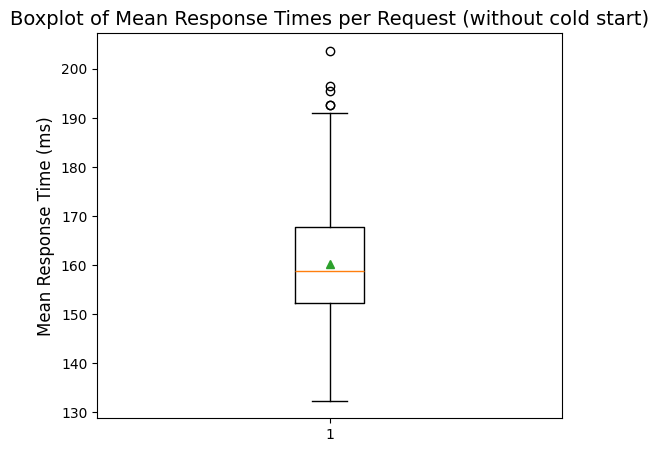

In [9]:
# Compute row means, skipping the first row
row_means_without_coldstart = combined.iloc[1:].mean(axis=1)

# Create a boxplot of row means
plt.figure(figsize=(6,5))
plt.boxplot(row_means_without_coldstart, showmeans=True)

# Add title and labels
plt.title("Boxplot of Mean Response Times per Request (without cold start)", fontsize=14)
plt.ylabel("Mean Response Time (ms)", fontsize=12)

plt.show()

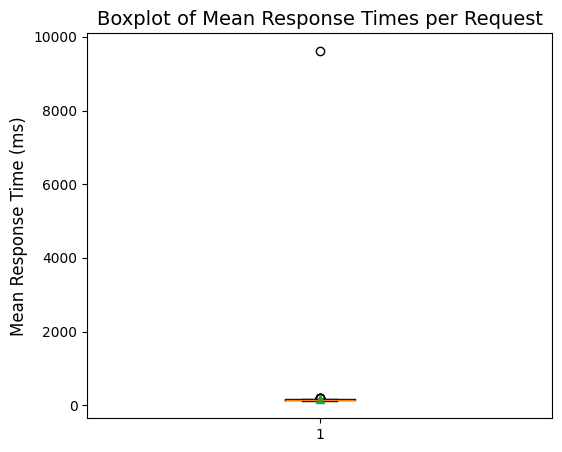

In [10]:
# GPU Boxplot
path_gpu = "./data/gpu"

# Load all CSV files
gpu_csv_files = glob.glob(path_gpu + "/*.csv")

gpu_dfs = [pd.read_csv(file, usecols=["response_time_ms"]) for file in gpu_csv_files]

gpu_combined = pd.concat(gpu_dfs, axis=1)
gpu_combined.columns = [f"run_{i + 1}" for i in range(len(gpu_dfs))]

# Display the combined DataFrame
gpu_combined.head()

# Create the boxplot
gpu_row_means = gpu_combined.mean(axis=1)

# Create a boxplot of row means
plt.figure(figsize=(6,5))
plt.boxplot(gpu_row_means, showmeans=True)

# Add title and labels
plt.title("Boxplot of Mean Response Times per Request", fontsize=14)
plt.ylabel("Mean Response Time (ms)", fontsize=12)

plt.show()


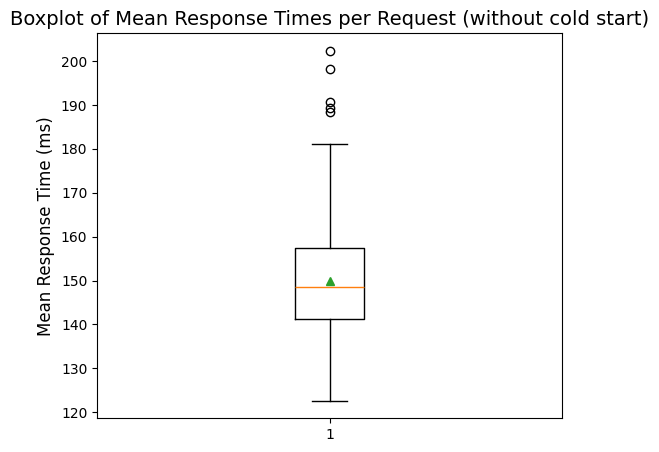

In [11]:
# Compute row means, skipping cold start
gpu_row_means_without_coldstart = gpu_combined.iloc[1:].mean(axis=1)

# Create a boxplot of row means
plt.figure(figsize=(6,5))
plt.boxplot(gpu_row_means_without_coldstart, showmeans=True)

# Add title and labels
plt.title("Boxplot of Mean Response Times per Request (without cold start)", fontsize=14)
plt.ylabel("Mean Response Time (ms)", fontsize=12)

plt.show()

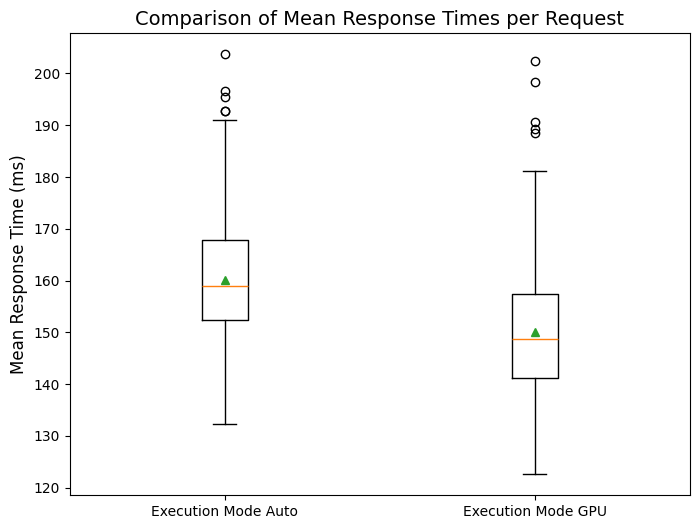

In [13]:
# Combine both CPU and GPU data for comparison

data = [row_means_without_coldstart, gpu_row_means_without_coldstart]

# Create the boxplot
plt.figure(figsize=(8,6))
plt.boxplot(data, tick_labels=["Execution Mode Auto", "Execution Mode GPU"], showmeans=True)

# Add title and labels
plt.title("Comparison of Mean Response Times per Request", fontsize=14)
plt.ylabel("Mean Response Time (ms)", fontsize=12)

plt.show()

In [14]:
# Calculate and print summary statistics

# mean of first values
auto_coldstart = combined.iloc[0].mean()
gpu_coldstart = gpu_combined.iloc[0].mean()

print(f"Auto Cold Start Mean: {auto_coldstart:.2f} ms")
print(f"GPU Cold Start Mean: {gpu_coldstart:.2f} ms")

Auto Cold Start Mean: 3477.47 ms
GPU Cold Start Mean: 9622.92 ms
